# DS-NYC-45 | Unit Project 2: Exploratory Data Analysis

In this project, you will implement the exploratory analysis plan developed in Unit Project 1.  This will lay the groundwork for our our first modeling exercise in Unit Project 3.

First, load the python libraries you will need for this project:

In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

pd.set_option('display.max_rows', 10)
pd.set_option('display.max_columns', 10)
pd.set_option('display.notebook_repr_html', True)

%matplotlib inline
plt.style.use('ggplot')

Then, read in your dataset:

In [2]:
df = pd.read_csv(os.path.join('..', '..', 'dataset', 'ucla-admissions.csv'))

df.head()

,admit,gre,gpa,prestige
0,0,380.0,3.61,3.0
1,1,660.0,3.67,3.0
2,1,800.0,4.00,1.0
3,1,640.0,3.19,4.0
4,0,520.0,2.93,4.0


## Questions

> ### Question 1.  How many observations are in our dataset?


In [5]:
df.shape

(400, 4)

Answer: 400

> ### Question 2.  Create a summary table.

In [11]:
df.describe(percentiles=None, include=None, exclude=None)

,admit,gre,gpa,prestige
count,400.000000,398.000000,398.00000,399.000000
mean,0.317500,588.040201,3.39093,2.486216
std,0.466087,115.628513,0.38063,0.945333
min,0.000000,220.000000,2.26000,1.000000
25%,0.000000,NaN,NaN,NaN
50%,0.000000,NaN,NaN,NaN
75%,1.000000,NaN,NaN,NaN
max,1.000000,800.000000,4.00000,4.000000


> ### Question 3.  Why would `gre` have a larger variance than `gpa`?

Answer: GRE scores have a range of 0 to 800, while GPA has a range of 0 to 4. The variance between numbers is likely to be higher when the range is larger.

> ### Question 4.  Drop data points with missing data.

In [41]:
df.dropna()

,admit,gre,gpa,prestige
0,0,380.0,3.61,3.0
1,1,660.0,3.67,3.0
2,1,800.0,4.00,1.0
3,1,640.0,3.19,4.0
4,0,520.0,2.93,4.0
...,...,...,...,...
395,0,620.0,4.00,2.0
396,0,560.0,3.04,3.0
397,0,460.0,2.63,2.0
398,0,700.0,3.65,2.0


> ### Question 5.  Confirm that you dropped the correct data.  How can you tell?

In [47]:
df.isnull().values.any()

False

Answer:

> ### Question 6.  Create boxplots for `gre` and `gpa`.

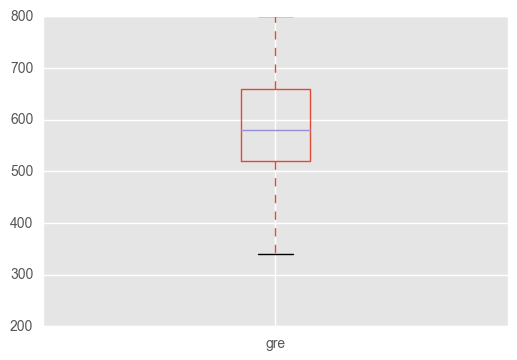

In [24]:
df.gre.plot(kind='box')

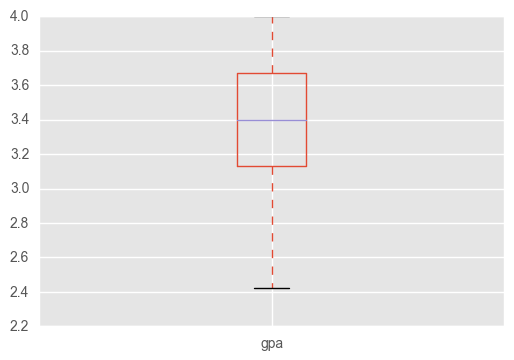

In [25]:
df.gpa.plot(kind='box')

> ### Question 7.  What do boxplots show?

Answer: Box plots show quartiles (and outliers) for one or more numerical variables. They show the min and max values, as well as each quartile. This allows you to see at a glance the distribution of data.

> ### Question 8.  Plot the distribution of each variable.

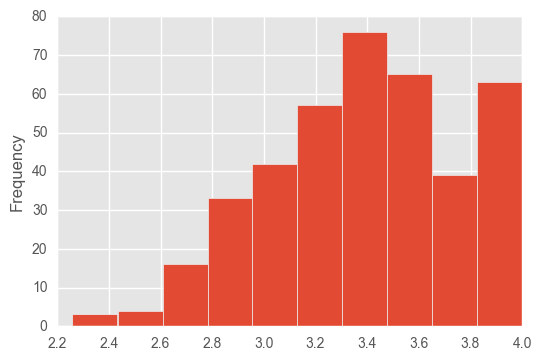

In [26]:
df.gpa.plot(kind='hist')

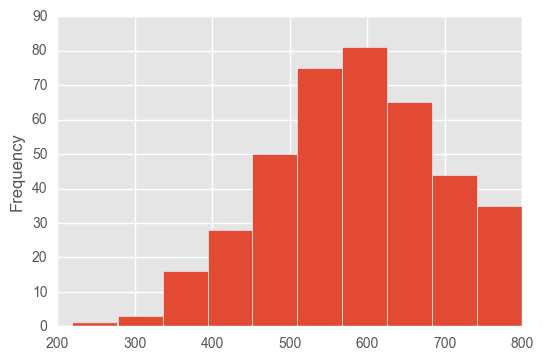

In [27]:
df.gre.plot(kind='hist')

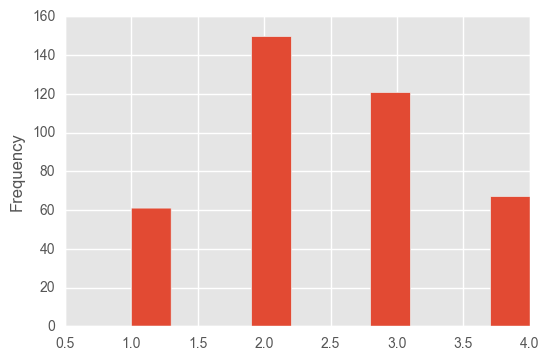

In [28]:
df.prestige.plot(kind='hist')

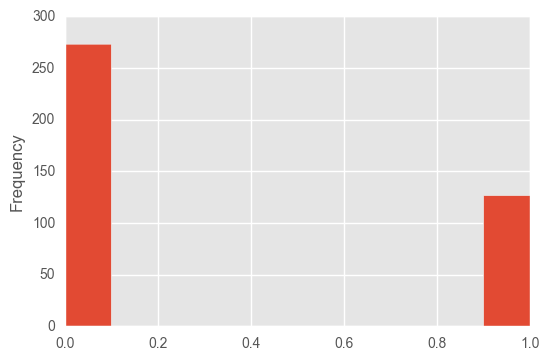

In [29]:
df.admit.plot(kind='hist')

> ### Question 9.  If our model had an assumption of a normal distribution for `gre` and `gpa`, would we meet that requirement?  Would their distributions need correction?  If so, why, why not?  How?

GRE: The GRE distribution looks roughly like a normal distribution.
GPA: The GPA distribution does not look like a normal distribution, but is instead weighed toward the higher end of GPAs. The distribution does not taper off in the higher GPA ranges, unlike you would expect to see in a normal distribution.

> ### Question 10.  Create a correlation matrix for the dataset

In [44]:
df.corr(method='pearson', min_periods=1)

,admit,gre,gpa,prestige
admit,1.000000,0.181202,0.174116,-0.243563
gre,0.181202,1.000000,0.382408,-0.124533
gpa,0.174116,0.382408,1.000000,-0.060976
prestige,-0.243563,-0.124533,-0.060976,1.000000


> ### Question 11.  What did you find?  Which of our variables are potentially colinear?

GPA and GRE may be colinear. Both higher GPA and higer GRE seem to be correlated with higher likeliehood of admission, at around the same factor.

> ### Question 12.  Write an analysis plan for exploring the association between graduate school admission rates and prestige of undergraduate schools.

Answer: Determine if higher prestige is a predicting factor for admission. I would want to find out if prestige, on its own, is a predicting factor, when not including GRE or GPA. To do this, I would isolate different bands of GRE and GPA groups and analyze if prestige had a factor on admission in each of those groups. Then I would compare the correlations of prestige and admit in each of those groups, to see if there were any large differences.

> ### Question 13.  What is your hypothesis?

Answer: Students who graduate from undergraduate schools with higher prestige points are more likely to gain admittance to UCLA. 